In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [114]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)
offset = int(X.shape[0] * 0.7)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [115]:
# MOAR FEATURES
new_features_df = pd.DataFrame()
new_features_df['Senior'] = np.where(df['agea']>=65, 1, 0)
means = df[['ppltrst','pplfair','pplhlp']].mean(axis=0)
stds = df[['ppltrst','pplfair','pplhlp']].std(axis=0)
new_features_df['trust_fair_help'] = ((df[['ppltrst','pplfair','pplhlp']] - means) / stds).mean(axis=1)
new_features_df['tvtot'] = df['tvtot']
new_features_df['school_meet_happy'] = df['happy'] * df['sclmeet']
new_features_df['activity_happy'] = df['sclact'] * df['happy']

In [116]:
df['school_meet_happy'] = df['happy'] * df['sclmeet']
df['activity_happy'] = df['sclact'] * df['happy']
df['trust_fair_help'] = ((df[['ppltrst','pplfair','pplhlp']] - means) / stds).mean(axis=1)
df['Senior'] = np.where(df['agea']>=65, 1, 0)


In [117]:
new_X = new_features_df
new_X.head()

,Senior,trust_fair_help,tvtot,school_meet_happy,activity_happy
0,0,0.191246,3.0,40.0,32.0
1,0,0.020453,6.0,27.0,18.0
2,0,1.090626,1.0,42.0,21.0
3,0,0.321425,4.0,60.0,20.0
4,0,0.170892,5.0,56.0,16.0


In [118]:
len(new_X)

8147

In [119]:
len(X)

8147

In [120]:
X.isnull().sum()

year       0
tvtot      0
ppltrst    0
pplfair    0
pplhlp     0
happy      0
sclmeet    0
sclact     0
gndr       0
agea       0
CH         0
CZ         0
DE         0
ES         0
NO         0
SE         0
dtype: int64

In [121]:
new_X.isnull().sum()

Senior                 0
trust_fair_help      441
tvtot                441
school_meet_happy    441
activity_happy       441
dtype: int64

In [122]:
new_X.fillna(method='ffill', axis=0, inplace=True)

In [123]:
new_X.isnull().sum()

Senior               0
trust_fair_help      0
tvtot                0
school_meet_happy    0
activity_happy       0
dtype: int64

In [124]:
len(X)

8147

In [125]:
len(new_X)

8147

In [126]:
newer_X = pd.concat([new_X, X], axis=1, ignore_index=True)

In [127]:
len(newer_X) # why are you longer?!

8588

In [131]:
newer_X.isnull().sum() # where did these come from?! where are the labels?!

0     441
1     441
2     441
3     441
4     441
5     441
6     441
7     441
8     441
9     441
10    441
11    441
12    441
13    441
14    441
15    441
16    441
17    441
18    441
19    441
20    441
dtype: int64

In [132]:
len(y)

8147

In [112]:
y.isnull().sum()

0

In [133]:
df['Senior'] = np.where(df['agea']>=65, 1, 0)
means = df[['ppltrst','pplfair','pplhlp']].mean(axis=0)
stds = df[['ppltrst','pplfair','pplhlp']].std(axis=0)
df['trust_fair_help'] = ((df[['ppltrst','pplfair','pplhlp']] - means) / stds).mean(axis=1)
df['school_meet_happy'] = df['happy'] * df['sclmeet']
df['activity_happy'] = df['sclact'] * df['happy']

In [138]:
len(df)

8147

In [139]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,school_meet_happy,activity_happy,trust_fair_help,Senior
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0,40.0,32.0,0.191246,0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0,27.0,18.0,0.020453,0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0,42.0,21.0,1.090626,0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0,60.0,20.0,0.321425,0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0,56.0,16.0,0.170892,0


In [141]:
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

In [142]:
X.head()

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,school_meet_happy,activity_happy,trust_fair_help,Senior
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,40.0,32.0,0.191246,0
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,27.0,18.0,0.020453,0
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,42.0,21.0,1.090626,0
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,60.0,20.0,0.321425,0
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,56.0,16.0,0.170892,0


In [143]:
len(X)

8147

In [149]:
X.isnull().sum()

year                 0
tvtot                0
ppltrst              0
pplfair              0
pplhlp               0
happy                0
sclmeet              0
sclact               0
gndr                 0
agea                 0
school_meet_happy    0
activity_happy       0
trust_fair_help      0
Senior               0
dtype: int64

In [144]:
new_X_train, new_y_train = X[:offset], y[:offset]
new_X_test, new_y_test = X[offset:], y[offset:]

In [145]:
len(new_X_test)

2445

In [146]:
len(new_y_test)

2445

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [147]:
params = {'n_estimators': 800,
          'max_depth': 4,
          'loss': 'exponential'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(new_X_train, new_y_train)

predict_train = clf.predict(new_X_train)
predict_test = clf.predict(new_X_test)

# Accuracy tables.
table_train = pd.crosstab(new_y_train, predict_train, margins=True)
table_test = pd.crosstab(new_y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.00999649245878639
Percent Type II errors: 0.07137846369694843

Test set accuracy:
Percent Type I errors: 0.08997955010224949
Percent Type II errors: 0.18282208588957055


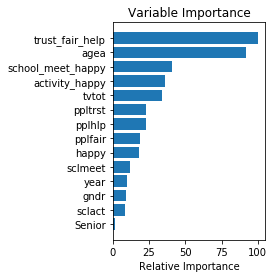

In [150]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Changing the number of leaves and the number of estimators did bring a little improvement into the training set, but the test set error rates did not improve with the hyper-parameter adjusting. 

With the changes the training set accuracy went from .04 for Type I errors and .17 for Type II errors to .01 and .07 respectively. The test sets however went from .06 and .18 to .09 and .18. A slight decrease in accuracy with the new featrues. 

Testing new features increased the error rate by almost double. Combining new features with old features brought the training error rate to .009 for Type I and .07 for Type II, however the testing error rate was the same as the original X without any new features. 

It appears that Age and a combined account of how much you trust others are the most imporant variables here.

# Challenge questions

## Questions
- Predict the running times of prospective Olympic sprinters using data from the last 20 Olympics.
   - Linear Regression, for predicting the continuous variable of running times.
- You have more features (columns) than rows in your dataset.
   - Lasso Regression, using the built in optimiation to reduce the features to only those that influence the outcome.
- Identify the most important characteristic predicting likelihood of being jailed before age 20.
   - Logistic Regression, comparing the different odds predictions to identify the most influential variable.
- Implement a filter to “highlight” emails that might be important to the recipient
   - Naive Bayes filter using positive words instead of negative. 
- You have 1000+ features.
   - Lasso Regression, for its embedded feature reduction qualities.
- Predict whether someone who adds items to their cart on a website will purchase the items.
   - Funnel analysis, using Logistic Regression to predict customer behavior in each step.
- Your dataset dimensions are 982400 x 500
   - Linear Regression, watching for multicolinearity, or Lasso Regression for its built in feature reduction.
- Identify faces in an image.
   - Random Forest classifier, although deep learning work best for this now.
- Predict which of three flavors of ice cream will be most popular with boys vs girls.
   - KNN Classifier works best when distinguishing between multiple categories.